In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [2]:
df_gemini_price_d = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/kaggle/BTCUSD_day.csv', sep = ',')
df_gemini_price_1h = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/kaggle/BTCUSD_1hr.csv', sep = ',')
df_gemini_price_d = df_gemini_price_d.sort_values(by = ['Date']).reset_index(drop = True)
df_gemini_price_1h = df_gemini_price_1h.sort_values(by = ['Date']).reset_index(drop = True)

In [3]:
# df_gemini_price_d.tail(1)
list_files = os.listdir('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test')
print(list_files)
df_aux = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test/'+'test_ma_1d.csv', sep = '\t')    
print(df_aux['date_test'].min())
print(df_aux['date_test'].max())


['test_ma_1d.csv', 'test_naive_1h.csv', 'test_prophet_1h.csv', 'test_lstm_1h.csv', 'test_ses_1d.csv', 'gridcv', 'test_ar_1d.csv', 'test_lstm_1d.csv', 'test_arima_1d.csv', 'test_naive_1d.csv', 'test_arima_1h.csv', 'test_ses_1h.csv', 'train_lstm_1d.csv', 'test_prophet_1d.csv', 'test_ar_1h.csv', 'test_ma_1h.csv']
2019-05-16
2020-04-09


### ESTRATEGIA 1 BUY IF PREDICT > ACTUAL_PRICE AND CONTRARIWISE FOR SELLING

In [4]:
data_resume = {
    'model': [],
    'periodicity': [],
    'profit': [],
    'loses': [],
    'wins': [],
    'misses': [],
    'win_ratio': [],
    'balance': [],
}

data_detailed = {
    'date_test': [],
    'model': [],
    'periodicity': [],
    'expected_balance': [],
    'real_balance': [],
}

min_pct_for_operation = 0.00
usd_amount = 100
list_files = os.listdir('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test')

for file in list_files:
    
    file_aux = file.split('_')
    
    if file_aux[0] == 'test':
                        
        model = file_aux[1].upper()
        periodicity = file_aux[2].split('.')[0].upper()
        
        if model == 'NAIVE':
            continue
            
        data_resume['model'].append(model)
        data_resume['periodicity'].append(periodicity)
        
        df_aux = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test/'+file, sep = '\t')      
        
        balance = 0
        win_ratio = 0
        
        profit = 0
        wins = 0
        loses = 0
        misses = 0
        
        accumulated_expected_balance = 0
        is_operation = None
        
        for i in range(len(df_aux) -1):
            print('---')
            y_test_predict = df_aux.iloc[i+1]['y_test_predict']
            y_test_real = df_aux.iloc[i+1]['y_test']
            y_test = df_aux.iloc[i]['y_test']
            date_test = df_aux.iloc[i]['date_test']
            
#             print('y_test_predict->', y_test_predict)
#             print('y_test_real->', y_test_real)
#             print('y_test->', y_test)
    
            if y_test_predict > y_test:
                if (y_test_predict/y_test - 1)*100 >= min_pct_for_operation:
                    print("BUY")
                    is_operation = True
                    expected_balance = (y_test_predict/y_test - 1)*usd_amount
                    real_balance = (y_test_real/y_test - 1)*usd_amount
            
            else:
                if (y_test/y_test_predict - 1)*100 >= min_pct_for_operation:
                    print("SELL")
                    is_operation = True
                    expected_balance = (y_test/y_test_predict - 1)*usd_amount
                    real_balance = (y_test/y_test_real - 1)*usd_amount
                
            if is_operation == True:
                if real_balance > 0:
                    profit += real_balance
                    wins += 1

                else:
                    loses += real_balance
                    misses += 1
            
                accumulated_expected_balance += expected_balance
            
#                 print('expected_balance', expected_balance)
#                 print('real_balance', real_balance)
            
            is_operation = False
            
            print('---')
            
            data_detailed['date_test'].append(date_test)
            data_detailed['model'].append(model)
            data_detailed['periodicity'].append(periodicity)
            data_detailed['expected_balance'].append(accumulated_expected_balance)
            data_detailed['real_balance'].append(profit + loses)
        
        win_ratio = round(100*wins/(wins+misses), 2)
        balance = round(profit + loses, 2)
        
        data_resume['profit'].append(profit)
        data_resume['loses'].append(loses)
        data_resume['wins'].append(wins)
        data_resume['misses'].append(misses)
        data_resume['win_ratio'].append(win_ratio)
        data_resume['balance'].append(balance)

df_detailed_strategy_1 = pd.DataFrame(data_detailed).sort_values(by = 'date_test').reset_index(drop = True)
df_resume_strategy_1 = pd.DataFrame(data_resume).sort_values(by = 'model').reset_index(drop = True)

---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY


BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
B

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
--

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
B

BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
-

SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---

SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
S

SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SEL

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
-

BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---


BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---


BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
-

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BU

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY


BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY


---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BU

---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
-

SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---


SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---


SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---

BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---


---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---


BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
-

SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
B

BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---

BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---


---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SE

BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---


SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---


SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY


SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
-

SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
-

SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
--

SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---


BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
-

---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BU

BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
S

---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL


SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---


BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
S

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
B

SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL

---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL

---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---


BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SE

---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---

BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---

BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---


---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BU

BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
-

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
-

---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BU

BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
--

SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY

BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BU

SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
SELL
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
BUY
---
---
SELL
---
---
BUY
---
---


In [5]:
# df_detailed_strategy_1
df_resume_strategy_1 = df_resume_strategy_1.sort_values(by = ['balance', 'periodicity']).reset_index(drop = True).copy()
df_resume_strategy_1.columns = ['Modelo', 'Periodicidade', 'Ganho', 'Perda', 'Acertos', 'Erros', 'Porcentagem de acertos', 'Balanço']
df_resume_strategy_1
#regra de 0%

,Modelo,Periodicidade,Ganho,Perda,Acertos,Erros,Porcentagem de acertos,Balanço
0,ARIMA,1D,425.263646,-526.666276,151,178,45.90,-101.40
1,MA,1D,437.213116,-516.607889,160,169,48.63,-79.39
2,PROPHET,1D,463.200050,-512.388414,151,178,45.90,-49.19
3,AR,1D,465.067602,-492.265991,155,174,47.11,-27.20
4,AR,1H,2014.709900,-1971.127054,4239,3654,53.71,43.58
5,LSTM,1D,511.958744,-448.514383,165,164,50.15,63.44
6,ARIMA,1H,2028.870085,-1958.221804,4208,3685,53.31,70.65
7,PROPHET,1H,2040.609759,-1949.942694,4013,3880,50.84,90.67
8,LSTM,1H,2067.042761,-1924.821895,4020,3873,50.93,142.22
9,SES,1D,570.557597,-413.193854,184,145,55.93,157.36


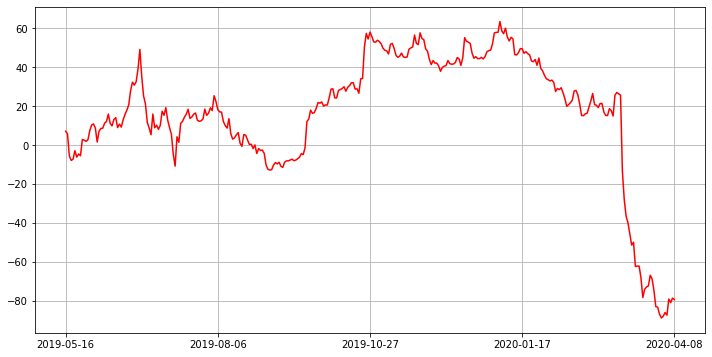

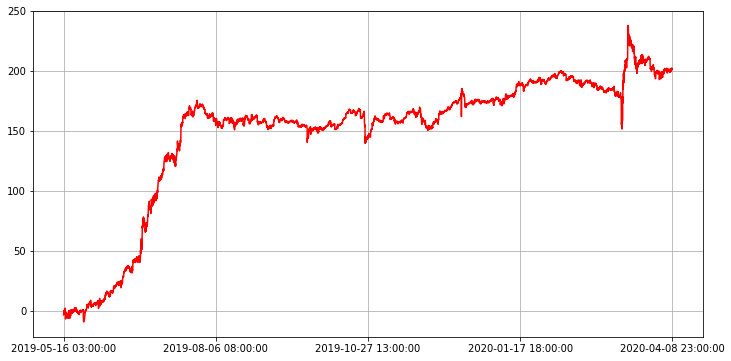

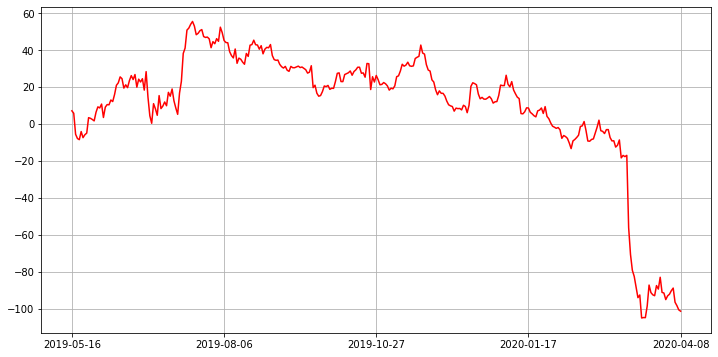

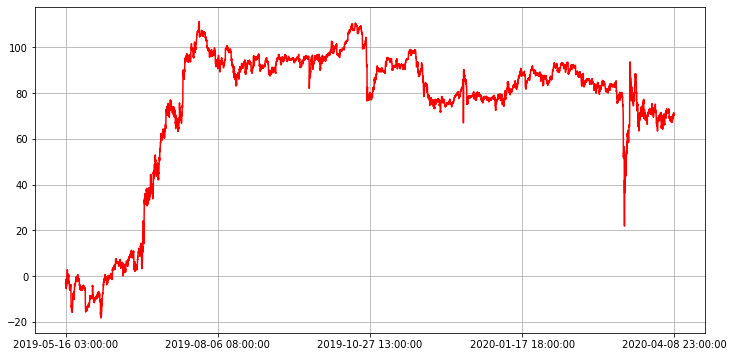

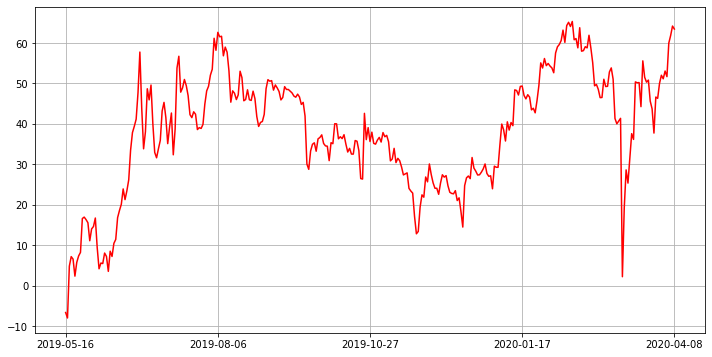

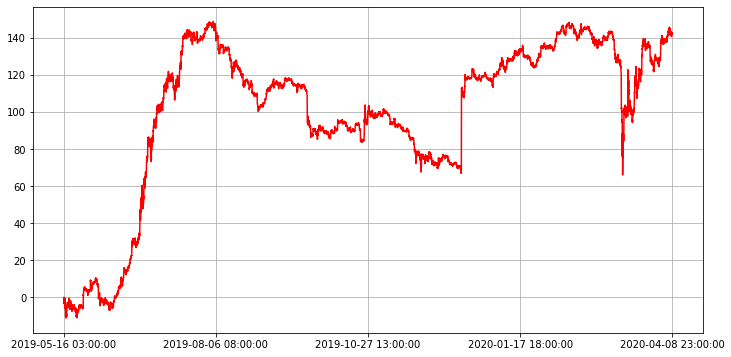

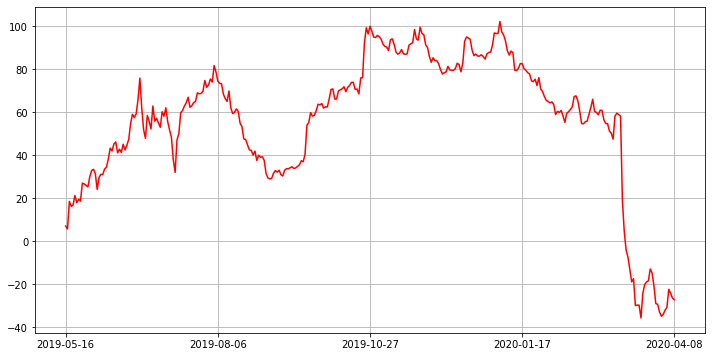

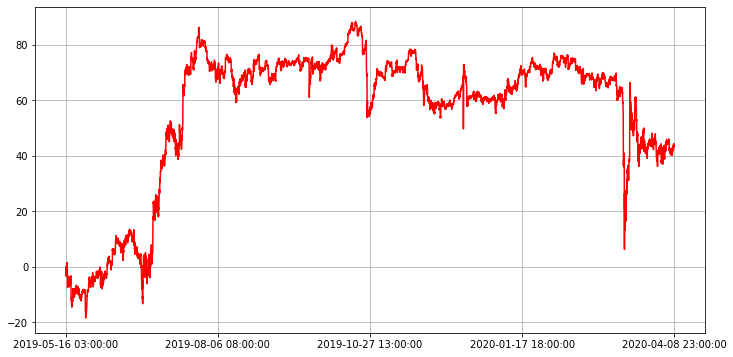

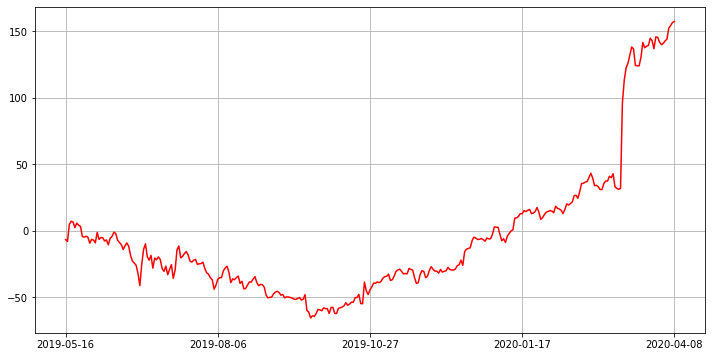

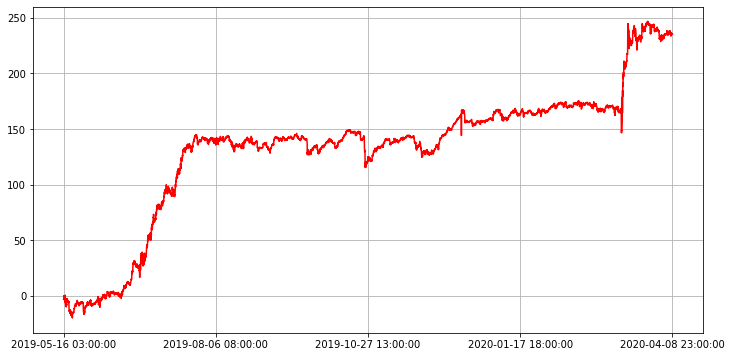

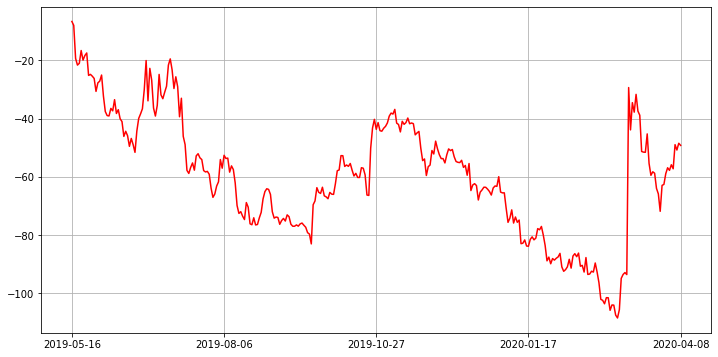

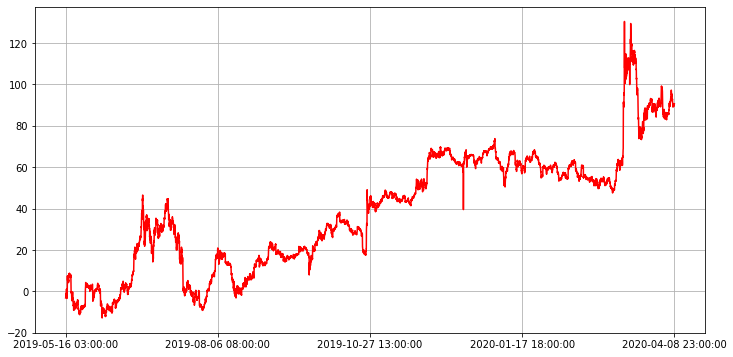

In [17]:
#regra de 0%
model_list = df_detailed_strategy_1['model'].unique()
periodicity_list = df_detailed_strategy_1['periodicity'].unique()

for model in model_list:
    for periodicity in periodicity_list:

        df_filtered = df_detailed_strategy_1[ (df_detailed_strategy_1['model'] == model)
                                            & (df_detailed_strategy_1['periodicity'] == periodicity)
                                            ]

        fig, ax = plt.subplots(figsize=(12, 6))


        # ax.plot(df_filtered['date_test'], df_filtered['expected_balance'], '--', label = 'expectced_balance', color="blue")
        ax.plot(df_filtered['date_test'], df_filtered['real_balance'], label = 'Balanço', color="red") #label real_balance
        # ax.set_ylim(-200, 500)
        plt.xticks(np.arange(0, len(df_filtered['date_test']), int(len(df_filtered['date_test'])*0.25)))
        ax.grid()
        # ax.legend()
        fname = 'balanco_'+'S1_'+model+'_'+periodicity
        plt.savefig('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/figures/'+fname+'.png', dpi=150)
        plt.show()

### ESTRATEGIA 2 BUY AND HOLD

In [18]:
data_resume = {
    'periodicity': [],
    'profit': [],
    'loses': [],
    'wins': [],
    'misses': [],
    'win_ratio': [],
    'balance': [],
}

data_detailed = {
    'date_test': [],
    'real_balance': [],
        'periodicity': [],
}

min_pct_for_operation = 0.00
usd_amount = 100
        
list_df = [df_gemini_price_d, df_gemini_price_1h]

for i in range(len(list_df)):
    
    df = list_df[i]
    train_size = int(len(df) * 0.80)
    df_aux = df[train_size:]
    
    if i == 0:
        periodicity = '1D'
    else:
        periodicity = '1H'
        
    balance = 0
    win_ratio = 0

    profit = 0
    wins = 0
    loses = 0
    misses = 0

    is_operation = None

    for i in range(len(df_aux) -1):
        print('---')
        y_test_real = df_aux.iloc[i+1]['Close']
        y_test = df_aux.iloc[i]['Close']
        date_test = df_aux.iloc[i]['Date']

    #             print('y_test_predict->', y_test_predict)
    #             print('y_test_real->', y_test_real)
    #             print('y_test->', y_test)



        print("BUY")
        is_operation = True
        real_balance = (y_test_real/y_test - 1)*usd_amount

        if is_operation == True:
            if real_balance > 0:
                profit += real_balance
                wins += 1

            else:
                loses += real_balance
                misses += 1

    #                 print('expected_balance', expected_balance)
        print('real_balance', real_balance)

        is_operation = False

        print('---')

        data_detailed['date_test'].append(date_test)
        data_detailed['periodicity'].append(periodicity)
        data_detailed['real_balance'].append(profit + loses)

    win_ratio = round(100*wins/(wins+misses), 2)
    balance = round(profit + loses, 2)

    data_resume['periodicity'].append(periodicity)
    data_resume['profit'].append(profit)
    data_resume['loses'].append(loses)
    data_resume['wins'].append(wins)
    data_resume['misses'].append(misses)
    data_resume['win_ratio'].append(win_ratio)
    data_resume['balance'].append(balance)

df_detailed_strategy_2 = pd.DataFrame(data_detailed).sort_values(by = 'date_test').reset_index(drop = True)
df_resume_strategy_2 = pd.DataFrame(data_resume).sort_values(by = 'periodicity').reset_index(drop = True)

---
BUY
real_balance -6.590977722175562
---
---
BUY
real_balance -1.3501912544553574
---
---
BUY
real_balance 12.804370934606712
---
---
BUY
real_balance -2.300535615762833
---
---
BUY
real_balance -0.6181932216137831
---
---
BUY
real_balance -4.205046458038164
---
---
BUY
real_balance 3.411023622047238
---
---
BUY
real_balance 1.5792038497852712
---
---
BUY
real_balance 0.8808949122728116
---
---
BUY
real_balance 8.36100147742318
---
---
BUY
real_balance 0.3559995931433191
---
---
BUY
real_balance -0.623607814912841
---
---
BUY
real_balance -0.7703061972863856
---
---
BUY
real_balance -4.450998824369057
---
---
BUY
real_balance 2.930227611146563
---
---
BUY
real_balance 0.5859420868462362
---
---
BUY
real_balance 2.09722043870606
---
---
BUY
real_balance -7.257925277992172
---
---
BUY
real_balance -5.279010330428213
---
---
BUY
real_balance 1.413675465096742
---
---
BUY
real_balance 0.12295576416108123
---
---
BUY
real_balance 2.589155236508134
---
---
BUY
real_balance -0.832564869586

real_balance -2.0438560400640293
---
---
BUY
real_balance 1.8652754166521346
---
---
BUY
real_balance -0.772530508470437
---
---
BUY
real_balance 8.841060419235514
---
---
BUY
real_balance -0.1530529590427543
---
---
BUY
real_balance -1.1174902138764375
---
---
BUY
real_balance 2.1278231465024167
---
---
BUY
real_balance 0.0823553865253901
---
---
BUY
real_balance -2.325158456989296
---
---
BUY
real_balance -0.8392466778382346
---
---
BUY
real_balance 1.032959186985094
---
---
BUY
real_balance -0.6043529935434777
---
---
BUY
real_balance -3.1475932816871444
---
---
BUY
real_balance 0.40291394611366993
---
---
BUY
real_balance -1.1295901096475047
---
---
BUY
real_balance 3.0459747347242105
---
---
BUY
real_balance 3.705377842292523
---
---
BUY
real_balance 5.585387225055616
---
---
BUY
real_balance -1.2656665602723605
---
---
BUY
real_balance 2.3452485118598654
---
---
BUY
real_balance -1.7596928934224043
---
---
BUY
real_balance 0.5364099651146148
---
---
BUY
real_balance -0.6353538153

BUY
real_balance 0.06593301507651361
---
---
BUY
real_balance -0.20621927144239827
---
---
BUY
real_balance -0.2978718042412787
---
---
BUY
real_balance 0.20347139899856703
---
---
BUY
real_balance -0.4687996609810341
---
---
BUY
real_balance 0.06817384075958888
---
---
BUY
real_balance -1.0568610492378672
---
---
BUY
real_balance -0.4265688531786549
---
---
BUY
real_balance 1.0882781632301608
---
---
BUY
real_balance 0.24437846875655644
---
---
BUY
real_balance 1.2423786191649855
---
---
BUY
real_balance -0.37960315809782985
---
---
BUY
real_balance -0.552836367477727
---
---
BUY
real_balance 0.2703673353768865
---
---
BUY
real_balance 0.08840807452006327
---
---
BUY
real_balance -1.2114186349804323
---
---
BUY
real_balance -2.1329054427226546
---
---
BUY
real_balance 0.5980875274834929
---
---
BUY
real_balance -1.2784569382329636
---
---
BUY
real_balance 0.33044619422573085
---
---
BUY
real_balance -0.27873771448154727
---
---
BUY
real_balance 0.5770035428201092
---
---
BUY
real_bala

BUY
real_balance 0.7373752059707028
---
---
BUY
real_balance 1.3048351907400058
---
---
BUY
real_balance 0.024338266284362753
---
---
BUY
real_balance -0.8789317507418293
---
---
BUY
real_balance 0.4698866596015927
---
---
BUY
real_balance 0.2529144155257512
---
---
BUY
real_balance -0.1314880620490455
---
---
BUY
real_balance 0.5993797877469342
---
---
BUY
real_balance 0.6545019939176555
---
---
BUY
real_balance 0.2888545863454217
---
---
BUY
real_balance -0.19998640186247307
---
---
BUY
real_balance 0.03147934109510864
---
---
BUY
real_balance 0.0
---
---
BUY
real_balance 0.0
---
---
BUY
real_balance 0.0
---
---
BUY
real_balance 0.420962401070879
---
---
BUY
real_balance -0.004092585988135777
---
---
BUY
real_balance -0.8323491235660785
---
---
BUY
real_balance 0.5128223269327714
---
---
BUY
real_balance 0.2685355836044234
---
---
BUY
real_balance 0.1426248113351125
---
---
BUY
real_balance 0.22922997655123734
---
---
BUY
real_balance -0.34970292736320463
---
---
BUY
real_balance 0.2

BUY
real_balance -0.10376656965231934
---
---
BUY
real_balance 0.7899160763227941
---
---
BUY
real_balance 0.204822545536687
---
---
BUY
real_balance -0.013730552162505294
---
---
BUY
real_balance -0.23306278703709715
---
---
BUY
real_balance -0.6131703060397675
---
---
BUY
real_balance 3.704332783710984
---
---
BUY
real_balance 0.7278330305420244
---
---
BUY
real_balance -0.5572211736541322
---
---
BUY
real_balance -0.048424749197528705
---
---
BUY
real_balance -0.01610745687165016
---
---
BUY
real_balance -0.02139616253532539
---
---
BUY
real_balance 0.05929264255097877
---
---
BUY
real_balance -0.0037743635164844136
---
---
BUY
real_balance 0.5276759360145711
---
---
BUY
real_balance -0.4772215269086333
---
---
BUY
real_balance -0.014084737300779082
---
---
BUY
real_balance 0.13734553344024736
---
---
BUY
real_balance 0.78727201705171
---
---
BUY
real_balance -0.24425654414376163
---
---
BUY
real_balance -0.3520409756706977
---
---
BUY
real_balance -0.16109681228898554
---
---
BUY
r

---
BUY
real_balance 0.331381479981796
---
---
BUY
real_balance -0.43390026149024985
---
---
BUY
real_balance 0.33697682746136604
---
---
BUY
real_balance -0.2105703819989646
---
---
BUY
real_balance 0.5342489889752278
---
---
BUY
real_balance 1.543216960051419
---
---
BUY
real_balance -0.16396558366507108
---
---
BUY
real_balance 0.2635372857408891
---
---
BUY
real_balance -0.019603013321833895
---
---
BUY
real_balance 0.18149174304957771
---
---
BUY
real_balance -0.7055927911902349
---
---
BUY
real_balance 0.6168017328651132
---
---
BUY
real_balance -0.2245109783714505
---
---
BUY
real_balance 0.5946635499512354
---
---
BUY
real_balance -0.1011645159840091
---
---
BUY
real_balance 0.6187513681268797
---
---
BUY
real_balance 0.030498249908750275
---
---
BUY
real_balance -0.7177099138890308
---
---
BUY
real_balance 0.6168485854759043
---
---
BUY
real_balance -0.24681385291074331
---
---
BUY
real_balance 0.6764908959807192
---
---
BUY
real_balance 0.49162525047259376
---
---
BUY
real_ba

BUY
real_balance 0.5719138582390038
---
---
BUY
real_balance -0.8291673060408011
---
---
BUY
real_balance 1.3147762572943922
---
---
BUY
real_balance 0.7018195686015583
---
---
BUY
real_balance -0.8624244912946
---
---
BUY
real_balance 0.4221704337557197
---
---
BUY
real_balance 1.5660383745770723
---
---
BUY
real_balance -1.189288943972111
---
---
BUY
real_balance -3.163419834643255
---
---
BUY
real_balance -1.493908224149476
---
---
BUY
real_balance 2.485017680997581
---
---
BUY
real_balance -1.2021203954584836
---
---
BUY
real_balance 1.0969013799727145
---
---
BUY
real_balance 0.6999090909090899
---
---
BUY
real_balance 0.21531119916151642
---
---
BUY
real_balance -0.8524580121864744
---
---
BUY
real_balance -1.20386581757026
---
---
BUY
real_balance 0.17795214328872877
---
---
BUY
real_balance 1.8341035484978674
---
---
BUY
real_balance -0.5375534691265171
---
---
BUY
real_balance -1.1740906099941717
---
---
BUY
real_balance 0.6373077713212494
---
---
BUY
real_balance -3.322831961

BUY
real_balance -0.591610765376227
---
---
BUY
real_balance -0.044878778516710405
---
---
BUY
real_balance -0.6557521058573657
---
---
BUY
real_balance -1.3154124152792823
---
---
BUY
real_balance -2.2299012693935194
---
---
BUY
real_balance 1.321851321639178
---
---
BUY
real_balance 1.1462311557788984
---
---
BUY
real_balance 0.1695805035414777
---
---
BUY
real_balance -1.4423832015963867
---
---
BUY
real_balance 0.6104245209828107
---
---
BUY
real_balance -0.3728024288845111
---
---
BUY
real_balance -2.091137829671552
---
---
BUY
real_balance -2.668318947098536
---
---
BUY
real_balance 0.6600355788767498
---
---
BUY
real_balance 0.8866926321206892
---
---
BUY
real_balance 0.39911461575707907
---
---
BUY
real_balance -1.5168243229278011
---
---
BUY
real_balance 0.47990359953933304
---
---
BUY
real_balance -0.2594314786724006
---
---
BUY
real_balance 1.3340371879553503
---
---
BUY
real_balance -0.16067383126148194
---
---
BUY
real_balance 0.3671432255304641
---
---
BUY
real_balance 1.

BUY
real_balance 0.2806924539339173
---
---
BUY
real_balance 0.3571978697553879
---
---
BUY
real_balance -2.3389066998465213
---
---
BUY
real_balance 0.4187602353538544
---
---
BUY
real_balance 0.10362838250819184
---
---
BUY
real_balance -1.225046001670771
---
---
BUY
real_balance -0.7566753489051559
---
---
BUY
real_balance 0.5558606969681579
---
---
BUY
real_balance -0.5886394095586223
---
---
BUY
real_balance 0.07127778889690628
---
---
BUY
real_balance 0.06867982841365361
---
---
BUY
real_balance 0.7315792401191956
---
---
BUY
real_balance 0.04473648990761525
---
---
BUY
real_balance -1.2016386066043716
---
---
BUY
real_balance 0.18151483933521728
---
---
BUY
real_balance -0.1400717749702629
---
---
BUY
real_balance -0.14642036748009346
---
---
BUY
real_balance -1.5595260663507138
---
---
BUY
real_balance 0.8309686513946923
---
---
BUY
real_balance -0.8323330248850014
---
---
BUY
real_balance 0.465592834011086
---
---
BUY
real_balance 0.6573398153544296
---
---
BUY
real_balance -0

---
BUY
real_balance 1.454486095531493
---
---
BUY
real_balance 0.012892392869368052
---
---
BUY
real_balance -0.6489709587300663
---
---
BUY
real_balance 0.16659815901249875
---
---
BUY
real_balance -0.40383377841058943
---
---
BUY
real_balance -0.858908089030963
---
---
BUY
real_balance 0.5458367485299265
---
---
BUY
real_balance 0.04916236104586247
---
---
BUY
real_balance 0.14459777094086856
---
---
BUY
real_balance 1.2059501597550648
---
---
BUY
real_balance -0.02666027094658796
---
---
BUY
real_balance -0.29076711448645653
---
---
BUY
real_balance 0.06113176373399032
---
---
BUY
real_balance -0.04014481027706518
---
---
BUY
real_balance 0.21732329963874975
---
---
BUY
real_balance 0.6494228954536441
---
---
BUY
real_balance -0.34820452563530946
---
---
BUY
real_balance 0.24650527418577095
---
---
BUY
real_balance -0.021618630956654616
---
---
BUY
real_balance 0.1797501329679596
---
---
BUY
real_balance -0.053603231742926916
---
---
BUY
real_balance 0.7333456837002705
---
---
BUY


BUY
real_balance 0.45177891122467617
---
---
BUY
real_balance 0.4308600337268098
---
---
BUY
real_balance -0.7227711966149242
---
---
BUY
real_balance 0.27120484464706607
---
---
BUY
real_balance 0.3561585145752444
---
---
BUY
real_balance 0.03941405005836174
---
---
BUY
real_balance -0.9778225806451601
---
---
BUY
real_balance 0.3743764634022151
---
---
BUY
real_balance -0.28364406557620514
---
---
BUY
real_balance 0.2945372036510685
---
---
BUY
real_balance -0.19597867643827982
---
---
BUY
real_balance 0.051906351796371375
---
---
BUY
real_balance 0.22960664733671088
---
---
BUY
real_balance 0.32584676673712565
---
---
BUY
real_balance -0.20763231826070871
---
---
BUY
real_balance -4.233059034773811
---
---
BUY
real_balance 0.45821224130340177
---
---
BUY
real_balance 0.07372646517103121
---
---
BUY
real_balance -0.2538666928300737
---
---
BUY
real_balance 0.02186807840189875
---
---
BUY
real_balance -0.4666804226904242
---
---
BUY
real_balance 0.2819386368849264
---
---
BUY
real_bal

BUY
real_balance -0.5925988446245034
---
---
BUY
real_balance 1.209621500357061
---
---
BUY
real_balance 0.12891222503619293
---
---
BUY
real_balance 0.10035319110115459
---
---
BUY
real_balance -0.0920686999899556
---
---
BUY
real_balance -0.07037179766433699
---
---
BUY
real_balance -0.25960888203304666
---
---
BUY
real_balance 0.8074706444355373
---
---
BUY
real_balance 0.3745609817333184
---
---
BUY
real_balance -0.8061360112235127
---
---
BUY
real_balance -0.4027147889748339
---
---
BUY
real_balance -0.17451778717425537
---
---
BUY
real_balance -0.6913365340521005
---
---
BUY
real_balance -2.9652547348422376
---
---
BUY
real_balance -1.1838882425038166
---
---
BUY
real_balance 0.4343134132965387
---
---
BUY
real_balance -0.591650544531841
---
---
BUY
real_balance -0.6375997818556245
---
---
BUY
real_balance 0.49932432700197094
---
---
BUY
real_balance 0.5322337057030557
---
---
BUY
real_balance -0.7386720768619015
---
---
BUY
real_balance 0.33261876772008314
---
---
BUY
real_balan

real_balance -0.32210990362320224
---
---
BUY
real_balance 0.256227251428931
---
---
BUY
real_balance 0.17481862444463925
---
---
BUY
real_balance 0.21240847389727424
---
---
BUY
real_balance 0.3024186617556879
---
---
BUY
real_balance 0.2618477796796803
---
---
BUY
real_balance -0.12677291630449616
---
---
BUY
real_balance -0.34892135578632466
---
---
BUY
real_balance -4.805929665205133
---
---
BUY
real_balance -0.338852355420749
---
---
BUY
real_balance 0.03247989143027041
---
---
BUY
real_balance 0.5415349107506628
---
---
BUY
real_balance 0.10572835834095073
---
---
BUY
real_balance -0.06637002211991039
---
---
BUY
real_balance -0.35880063946703844
---
---
BUY
real_balance -0.04673982016003553
---
---
BUY
real_balance -0.15029801536424747
---
---
BUY
real_balance -0.8596216630862186
---
---
BUY
real_balance 0.21689915544893523
---
---
BUY
real_balance -0.23588758557038236
---
---
BUY
real_balance -0.48697099659569254
---
---
BUY
real_balance -1.7050355565104813
---
---
BUY
real_bal

real_balance 0.10337230817085707
---
---
BUY
real_balance 0.33139718302921395
---
---
BUY
real_balance -0.1718555393667276
---
---
BUY
real_balance 0.617096524906624
---
---
BUY
real_balance -0.6320195011342067
---
---
BUY
real_balance 0.054587941457517886
---
---
BUY
real_balance 0.35580997118911384
---
---
BUY
real_balance -0.5750223771611718
---
---
BUY
real_balance 0.09533313053722292
---
---
BUY
real_balance -0.24179812980413828
---
---
BUY
real_balance -0.3088168442790473
---
---
BUY
real_balance 0.3649881716796255
---
---
BUY
real_balance -0.03888913655683002
---
---
BUY
real_balance -0.19632421107367293
---
---
BUY
real_balance 0.3523483552005935
---
---
BUY
real_balance 0.30099307820135035
---
---
BUY
real_balance 0.12439984395706816
---
---
BUY
real_balance 0.0
---
---
BUY
real_balance -0.13556603773585696
---
---
BUY
real_balance 0.8335828854777905
---
---
BUY
real_balance -0.08806552824797143
---
---
BUY
real_balance 0.526608448427357
---
---
BUY
real_balance -0.04346759472

BUY
real_balance -0.05961711272868264
---
---
BUY
real_balance -0.7645242141366193
---
---
BUY
real_balance 0.004105226735573453
---
---
BUY
real_balance -0.07359782940160597
---
---
BUY
real_balance 0.48269959652769145
---
---
BUY
real_balance 0.41194965492401536
---
---
BUY
real_balance -0.1502604838193644
---
---
BUY
real_balance 0.5762180677131523
---
---
BUY
real_balance -0.290367950637449
---
---
BUY
real_balance 0.04598618091060658
---
---
BUY
real_balance -0.25314642817744204
---
---
BUY
real_balance 0.050641360215286646
---
---
BUY
real_balance -0.19160283137787948
---
---
BUY
real_balance 0.18526722392560036
---
---
BUY
real_balance -0.05614648900197361
---
---
BUY
real_balance 0.29874293165879084
---
---
BUY
real_balance -0.14491197419831403
---
---
BUY
real_balance -0.07033295777213455
---
---
BUY
real_balance 0.07765337511040915
---
---
BUY
real_balance -0.1307749237630662
---
---
BUY
real_balance -0.2976842897576826
---
---
BUY
real_balance 0.5334233560238433
---
---
BUY


BUY
real_balance 0.45655560863679945
---
---
BUY
real_balance -0.19511201629327513
---
---
BUY
real_balance -0.382824329343201
---
---
BUY
real_balance -0.19491320575376614
---
---
BUY
real_balance -0.33455490343575756
---
---
BUY
real_balance -0.1895653588613322
---
---
BUY
real_balance 0.43040126768234543
---
---
BUY
real_balance -0.15110426296865986
---
---
BUY
real_balance -0.050410018631141806
---
---
BUY
real_balance -0.1003562389157775
---
---
BUY
real_balance 0.13157298230719316
---
---
BUY
real_balance 0.325053172278178
---
---
BUY
real_balance -0.15558974358974575
---
---
BUY
real_balance 0.11268815171912028
---
---
BUY
real_balance -0.306696217857938
---
---
BUY
real_balance 0.09108771077541711
---
---
BUY
real_balance 0.04061796897814052
---
---
BUY
real_balance -0.13763386923856258
---
---
BUY
real_balance -0.41964649646126784
---
---
BUY
real_balance -0.6037490115819333
---
---
BUY
real_balance -1.0813070525179547
---
---
BUY
real_balance -0.063077155977187
---
---
BUY
re

BUY
real_balance 0.0
---
---
BUY
real_balance 0.10759207234287693
---
---
BUY
real_balance -0.9597328930292748
---
---
BUY
real_balance -0.21765101769383177
---
---
BUY
real_balance -0.023551171393343395
---
---
BUY
real_balance -0.45399101391326857
---
---
BUY
real_balance 0.4228573410908876
---
---
BUY
real_balance 0.14138704889696818
---
---
BUY
real_balance 0.3018404877742187
---
---
BUY
real_balance -0.5043377220295797
---
---
BUY
real_balance 0.3654181136277357
---
---
BUY
real_balance -0.02177145872462871
---
---
BUY
real_balance 0.39504732940132126
---
---
BUY
real_balance -0.32780858429581894
---
---
BUY
real_balance 0.5505624884735827
---
---
BUY
real_balance -0.06407215209065509
---
---
BUY
real_balance -0.16468780282490325
---
---
BUY
real_balance 0.42367376752234787
---
---
BUY
real_balance -0.13936771965366024
---
---
BUY
real_balance 0.180135480457011
---
---
BUY
real_balance 0.06953364879653812
---
---
BUY
real_balance -0.3972854396532055
---
---
BUY
real_balance 0.2179

real_balance -0.033556529709388716
---
---
BUY
real_balance -0.090502567995554
---
---
BUY
real_balance 0.17867594594371816
---
---
BUY
real_balance -0.1121102804890306
---
---
BUY
real_balance 0.06216883822576236
---
---
BUY
real_balance 0.1316117098851155
---
---
BUY
real_balance -2.0991119005328684
---
---
BUY
real_balance -0.15252070399007778
---
---
BUY
real_balance 0.39514870771109045
---
---
BUY
real_balance -0.14177568311747324
---
---
BUY
real_balance 0.00012083146547769985
---
---
BUY
real_balance 0.22909618173030388
---
---
BUY
real_balance 0.033152661375090986
---
---
BUY
real_balance -0.056762648971808716
---
---
BUY
real_balance -0.08513203906909128
---
---
BUY
real_balance 0.4111784541041885
---
---
BUY
real_balance 0.028846119175329754
---
---
BUY
real_balance -0.2174850794421368
---
---
BUY
real_balance 0.09115748328276663
---
---
BUY
real_balance 0.002646813957873917
---
---
BUY
real_balance 0.015399237256508158
---
---
BUY
real_balance -0.21399238336271553
---
---
BU

BUY
real_balance 0.20045159490011955
---
---
BUY
real_balance -0.3084062595768988
---
---
BUY
real_balance 0.185421027720456
---
---
BUY
real_balance -0.21247424739065934
---
---
BUY
real_balance -0.18229938830867098
---
---
BUY
real_balance 0.2603794204907528
---
---
BUY
real_balance 0.2132492528960528
---
---
BUY
real_balance 0.12410027302061089
---
---
BUY
real_balance -0.06962874391205354
---
---
BUY
real_balance -0.16318827573711392
---
---
BUY
real_balance 0.13215252715825798
---
---
BUY
real_balance 0.5490776128625807
---
---
BUY
real_balance 0.24811884541866558
---
---
BUY
real_balance -0.42296641248456
---
---
BUY
real_balance 0.5012324792829537
---
---
BUY
real_balance -0.5575773361212177
---
---
BUY
real_balance -0.20808121472866148
---
---
BUY
real_balance -0.2831236436190432
---
---
BUY
real_balance 0.16121720820050367
---
---
BUY
real_balance -0.0908808876398215
---
---
BUY
real_balance -0.0009741746305413912
---
---
BUY
real_balance -0.08670238675110298
---
---
BUY
real_

BUY
real_balance -0.360026840553751
---
---
BUY
real_balance 0.36407420346407093
---
---
BUY
real_balance -0.5330747136502278
---
---
BUY
real_balance 0.12688483962768338
---
---
BUY
real_balance 0.00021981621167732612
---
---
BUY
real_balance 0.3857766034732979
---
---
BUY
real_balance -0.23780249473648318
---
---
BUY
real_balance 0.50812617771685
---
---
BUY
real_balance -0.5030459008911081
---
---
BUY
real_balance 0.748342321342732
---
---
BUY
real_balance 0.0015249996459854032
---
---
BUY
real_balance 0.2987864455741507
---
---
BUY
real_balance -0.9223601472648557
---
---
BUY
real_balance 0.08275813687868006
---
---
BUY
real_balance -0.3299921581684351
---
---
BUY
real_balance 0.7040357611047376
---
---
BUY
real_balance 0.051503307341627114
---
---
BUY
real_balance 0.24200637352522758
---
---
BUY
real_balance -0.1443745600492652
---
---
BUY
real_balance 0.39833952560988095
---
---
BUY
real_balance 0.7415357701749059
---
---
BUY
real_balance -0.8523115935705983
---
---
BUY
real_bala

real_balance -0.050673603523765376
---
---
BUY
real_balance 0.479005100899621
---
---
BUY
real_balance -0.11975118238595206
---
---
BUY
real_balance -0.3866577364692647
---
---
BUY
real_balance 0.14456985305506542
---
---
BUY
real_balance -0.3048770008627355
---
---
BUY
real_balance 0.23030511980695056
---
---
BUY
real_balance 0.20913737711458769
---
---
BUY
real_balance -0.12208545295190332
---
---
BUY
real_balance 0.07423437211810935
---
---
BUY
real_balance -0.06399109848332918
---
---
BUY
real_balance 0.035280641466206575
---
---
BUY
real_balance 0.03206199874499216
---
---
BUY
real_balance 0.26007683255724334
---
---
BUY
real_balance 0.005023633914102987
---
---
BUY
real_balance -0.16953912757562417
---
---
BUY
real_balance 0.06998933005799568
---
---
BUY
real_balance -0.19530736625331668
---
---
BUY
real_balance -0.03961883474822292
---
---
BUY
real_balance -0.35178515789667797
---
---
BUY
real_balance -0.7881320374063749
---
---
BUY
real_balance 0.32570572470393966
---
---
BUY
r

BUY
real_balance 0.07016488748559091
---
---
BUY
real_balance 0.3167067767078757
---
---
BUY
real_balance 0.046114492694604436
---
---
BUY
real_balance 0.0
---
---
BUY
real_balance 0.42980958634273314
---
---
BUY
real_balance -0.3546150295577921
---
---
BUY
real_balance -0.4308054079660284
---
---
BUY
real_balance 0.17765407009693313
---
---
BUY
real_balance -0.5863501577370145
---
---
BUY
real_balance -1.4409748183397686
---
---
BUY
real_balance 1.223582802975387
---
---
BUY
real_balance -0.4557675956667673
---
---
BUY
real_balance -1.4938897231953296
---
---
BUY
real_balance -4.421667482813563
---
---
BUY
real_balance 0.24244259856571748
---
---
BUY
real_balance 0.85489755348227
---
---
BUY
real_balance -1.4874140274692138
---
---
BUY
real_balance 0.15546353428013138
---
---
BUY
real_balance 1.093366023643716
---
---
BUY
real_balance 0.013894697839433867
---
---
BUY
real_balance 0.3345490674304452
---
---
BUY
real_balance 1.2352706700140548
---
---
BUY
real_balance 0.9186023539099031

real_balance 0.4674228264024638
---
---
BUY
real_balance -0.007155586758111898
---
---
BUY
real_balance -0.5534499822447803
---
---
BUY
real_balance 0.06408446114745114
---
---
BUY
real_balance -1.2303934871099043
---
---
BUY
real_balance -0.4365792409181002
---
---
BUY
real_balance 0.06954083730479343
---
---
BUY
real_balance -0.3067873777331642
---
---
BUY
real_balance 0.9355036353804191
---
---
BUY
real_balance -0.07344508130343597
---
---
BUY
real_balance -0.013575386589981253
---
---
BUY
real_balance 0.30637910368340737
---
---
BUY
real_balance -0.07683935925271168
---
---
BUY
real_balance -0.2902163829269
---
---
BUY
real_balance 0.32001624782320715
---
---
BUY
real_balance -0.3248774015279454
---
---
BUY
real_balance -0.060658459933848885
---
---
BUY
real_balance -0.05218145965274479
---
---
BUY
real_balance 0.018273046020600425
---
---
BUY
real_balance 0.30467828143865283
---
---
BUY
real_balance 0.15981944647966984
---
---
BUY
real_balance 0.2926031562856535
---
---
BUY
real_b

BUY
real_balance -0.8456357197416886
---
---
BUY
real_balance 0.009524329760313144
---
---
BUY
real_balance 0.14145083743097864
---
---
BUY
real_balance 0.061954662612806466
---
---
BUY
real_balance -0.1844910144489953
---
---
BUY
real_balance 0.16130793853497138
---
---
BUY
real_balance 0.09590193956778847
---
---
BUY
real_balance -0.30977653631285573
---
---
BUY
real_balance -0.158872036560187
---
---
BUY
real_balance 0.38672668694783585
---
---
BUY
real_balance -0.09994352841191656
---
---
BUY
real_balance 0.47727053305703926
---
---
BUY
real_balance -0.060715777746822575
---
---
BUY
real_balance 0.07510478441163926
---
---
BUY
real_balance -0.33388888656827875
---
---
BUY
real_balance 0.3453454502273745
---
---
BUY
real_balance 0.18015333917136278
---
---
BUY
real_balance -0.02904508380687787
---
---
BUY
real_balance 0.1889174018088191
---
---
BUY
real_balance -0.11696620467559482
---
---
BUY
real_balance 0.6387193385545942
---
---
BUY
real_balance -0.5621994379386042
---
---
BUY
r

BUY
real_balance 0.15715848494739504
---
---
BUY
real_balance -0.04125579853744288
---
---
BUY
real_balance -0.09261901963748542
---
---
BUY
real_balance 0.11146991852613031
---
---
BUY
real_balance -0.1887003594958636
---
---
BUY
real_balance -0.06152414507364368
---
---
BUY
real_balance 0.6167420649500377
---
---
BUY
real_balance -0.19456445993031313
---
---
BUY
real_balance 0.0494341604012849
---
---
BUY
real_balance 0.059877899332549944
---
---
BUY
real_balance -0.1235899102647986
---
---
BUY
real_balance 0.1282121114355883
---
---
BUY
real_balance -0.05621276601679437
---
---
BUY
real_balance 0.03768234065952836
---
---
BUY
real_balance 0.3062280792314631
---
---
BUY
real_balance 0.44757789148808236
---
---
BUY
real_balance 1.1901151898576323
---
---
BUY
real_balance 1.1536766859060243
---
---
BUY
real_balance 0.15786803747168676
---
---
BUY
real_balance 0.21245502382520876
---
---
BUY
real_balance -0.22736921552902745
---
---
BUY
real_balance 0.05119698275513063
---
---
BUY
real_

BUY
real_balance 0.12967118892619478
---
---
BUY
real_balance 0.20189725055685948
---
---
BUY
real_balance 0.19053535720525705
---
---
BUY
real_balance -0.08166089965397916
---
---
BUY
real_balance -0.039063041099318685
---
---
BUY
real_balance -0.1564518006507476
---
---
BUY
real_balance 0.15988918791005613
---
---
BUY
real_balance -0.023279951112109565
---
---
BUY
real_balance -0.5778375928469526
---
---
BUY
real_balance 0.02871824612371565
---
---
BUY
real_balance 0.13672092763965527
---
---
BUY
real_balance -0.2222683058200392
---
---
BUY
real_balance -0.3907078214098414
---
---
BUY
real_balance -0.5742869025896713
---
---
BUY
real_balance 0.25337956794486693
---
---
BUY
real_balance -0.12672081101319232
---
---
BUY
real_balance -0.0753974896574583
---
---
BUY
real_balance -0.24804219814376083
---
---
BUY
real_balance 0.5491101480240568
---
---
BUY
real_balance 0.06764988238463499
---
---
BUY
real_balance 0.12567078182375013
---
---
BUY
real_balance -0.3013153655427536
---
---
BUY


---
BUY
real_balance -0.6766409099124404
---
---
BUY
real_balance 0.5087567987955399
---
---
BUY
real_balance -0.08370224322011843
---
---
BUY
real_balance 0.2801099589825551
---
---
BUY
real_balance 0.07834042068681768
---
---
BUY
real_balance -0.10783471115261012
---
---
BUY
real_balance 0.2816385296364299
---
---
BUY
real_balance -0.29936497590266065
---
---
BUY
real_balance 0.32317058825714895
---
---
BUY
real_balance 0.4731972161094333
---
---
BUY
real_balance -0.2048971399160049
---
---
BUY
real_balance 0.02658792046765779
---
---
BUY
real_balance -0.27171538797585715
---
---
BUY
real_balance 0.4199124637373597
---
---
BUY
real_balance 0.20041533035966008
---
---
BUY
real_balance -0.28291439846659383
---
---
BUY
real_balance 0.24178056753252353
---
---
BUY
real_balance -0.6240952030425739
---
---
BUY
real_balance -0.032838979127491896
---
---
BUY
real_balance 0.20154443301425573
---
---
BUY
real_balance 0.11424993745217105
---
---
BUY
real_balance 0.12790746344357729
---
---
BUY


---
---
BUY
real_balance 0.07158623158145527
---
---
BUY
real_balance -0.18686231800985054
---
---
BUY
real_balance -0.16320764468743532
---
---
BUY
real_balance 0.06258275822004222
---
---
BUY
real_balance 0.17509913278215272
---
---
BUY
real_balance -0.15000298399202583
---
---
BUY
real_balance 0.3981568006767633
---
---
BUY
real_balance -0.3436854945716772
---
---
BUY
real_balance -0.855973375333563
---
---
BUY
real_balance 0.3484276146554999
---
---
BUY
real_balance -0.13937209809855577
---
---
BUY
real_balance -0.07469762493930165
---
---
BUY
real_balance 0.09569832001425915
---
---
BUY
real_balance -0.3786122790609525
---
---
BUY
real_balance 0.17348902087204188
---
---
BUY
real_balance 0.03544862787168146
---
---
BUY
real_balance 0.17057949548768825
---
---
BUY
real_balance 0.11560693641619046
---
---
BUY
real_balance -0.15173210161661954
---
---
BUY
real_balance 0.0068232861408557
---
---
BUY
real_balance -0.028332051645285627
---
---
BUY
real_balance -0.04950838635049415
---
-

BUY
real_balance -0.14706287759747028
---
---
BUY
real_balance -0.2788434685748964
---
---
BUY
real_balance -0.17558972698938913
---
---
BUY
real_balance 0.20501945658111254
---
---
BUY
real_balance 0.2832677236601411
---
---
BUY
real_balance -0.4945571118459169
---
---
BUY
real_balance 0.007894209064285285
---
---
BUY
real_balance -0.1284307764515269
---
---
BUY
real_balance -0.1917190200220964
---
---
BUY
real_balance -0.5569996286669099
---
---
BUY
real_balance 0.4684342265831365
---
---
BUY
real_balance -0.030633481109543226
---
---
BUY
real_balance -0.149357196199007
---
---
BUY
real_balance 0.7723681485590994
---
---
BUY
real_balance -0.16291552776646068
---
---
BUY
real_balance -0.11913306961232051
---
---
BUY
real_balance -0.15899796046940917
---
---
BUY
real_balance 0.21732597077435134
---
---
BUY
real_balance -0.09348656877612438
---
---
BUY
real_balance -0.0025636725463740184
---
---
BUY
real_balance 0.2058468187746909
---
---
BUY
real_balance -0.711255143594236
---
---
BUY


---
BUY
real_balance 0.30238804512379147
---
---
BUY
real_balance 0.7352869576394472
---
---
BUY
real_balance -0.11512841506547966
---
---
BUY
real_balance -0.37771966871380513
---
---
BUY
real_balance 0.057897635814141424
---
---
BUY
real_balance 0.053786459986859825
---
---
BUY
real_balance 0.5123462839853765
---
---
BUY
real_balance 0.0560901226355881
---
---
BUY
real_balance 0.3487023525348132
---
---
BUY
real_balance -0.9243981892795294
---
---
BUY
real_balance -0.23427476722948093
---
---
BUY
real_balance 0.44299610894942276
---
---
BUY
real_balance 0.3197895703275444
---
---
BUY
real_balance -0.09789005421602104
---
---
BUY
real_balance 0.49843357729972837
---
---
BUY
real_balance -0.20038461538461894
---
---
BUY
real_balance -0.2809475911345394
---
---
BUY
real_balance 0.19439613526570643
---
---
BUY
real_balance -0.0011571707945634557
---
---
BUY
real_balance -0.14464802314367864
---
---
BUY
real_balance -0.2521487204249162
---
---
BUY
real_balance 0.6211703290479376
---
---
B

---
BUY
real_balance -0.11888729585534108
---
---
BUY
real_balance 0.0645288080100892
---
---
BUY
real_balance 0.24944497480747785
---
---
BUY
real_balance 0.2964886892998564
---
---
BUY
real_balance -0.3718310539844727
---
---
BUY
real_balance 0.10641738251642163
---
---
BUY
real_balance -0.022108862423320108
---
---
BUY
real_balance 0.04877142459007722
---
---
BUY
real_balance 0.03744384684556401
---
---
BUY
real_balance -0.16939268836990706
---
---
BUY
real_balance -0.07569410687522371
---
---
BUY
real_balance 0.5378453820947371
---
---
BUY
real_balance 0.36677202392567665
---
---
BUY
real_balance 0.05923481844678502
---
---
BUY
real_balance -0.7025838537936369
---
---
BUY
real_balance -1.5263779618904794
---
---
BUY
real_balance 0.2547711976397471
---
---
BUY
real_balance -0.16052610873880102
---
---
BUY
real_balance 0.03715128453380956
---
---
BUY
real_balance -0.3164359470417377
---
---
BUY
real_balance 0.20936906017923196
---
---
BUY
real_balance 0.08603066788477332
---
---
BUY


BUY
real_balance 0.24038974352065257
---
---
BUY
real_balance 1.7975353335319522
---
---
BUY
real_balance 0.014744296488000685
---
---
BUY
real_balance 0.18174617144868233
---
---
BUY
real_balance -0.24972216487375576
---
---
BUY
real_balance 0.13662315129392422
---
---
BUY
real_balance -0.5639971899087493
---
---
BUY
real_balance 0.607109964188135
---
---
BUY
real_balance 0.011539222366319102
---
---
BUY
real_balance 0.10526951963913955
---
---
BUY
real_balance 0.19264481017076118
---
---
BUY
real_balance 0.4027354457589061
---
---
BUY
real_balance -0.4392023866421346
---
---
BUY
real_balance -0.1088327712681525
---
---
BUY
real_balance -0.29251187163710224
---
---
BUY
real_balance -0.22173314993122473
---
---
BUY
real_balance 0.1684064252510442
---
---
BUY
real_balance -0.7564997764962222
---
---
BUY
real_balance 0.5418292394754332
---
---
BUY
real_balance -0.15127858541832406
---
---
BUY
real_balance 0.08531291717130962
---
---
BUY
real_balance 0.6861173311426993
---
---
BUY
real_ba

real_balance -0.6175153578216963
---
---
BUY
real_balance 0.22253435160806134
---
---
BUY
real_balance 0.23962945380751055
---
---
BUY
real_balance 0.12320754716981241
---
---
BUY
real_balance -2.5029539077325413
---
---
BUY
real_balance 14.26655146886857
---
---
BUY
real_balance -9.691770047125924
---
---
BUY
real_balance 0.08597341005383008
---
---
BUY
real_balance -2.0365119913164698
---
---
BUY
real_balance 0.9521207802652754
---
---
BUY
real_balance 0.6159558101380025
---
---
BUY
real_balance -1.1085156723126932
---
---
BUY
real_balance -0.5060782643093953
---
---
BUY
real_balance -1.6760107579705141
---
---
BUY
real_balance -2.4808555559227674
---
---
BUY
real_balance -4.728299223712074
---
---
BUY
real_balance 2.410964636953339
---
---
BUY
real_balance -1.7032336102586476
---
---
BUY
real_balance -7.52942301376468
---
---
BUY
real_balance 2.750734495788598
---
---
BUY
real_balance 4.339969372128638
---
---
BUY
real_balance 1.8063144475801707
---
---
BUY
real_balance 1.6782925859

BUY
real_balance 0.44473839554211025
---
---
BUY
real_balance 1.645076923076938
---
---
BUY
real_balance -0.4051806209540709
---
---
BUY
real_balance 0.8586417351553743
---
---
BUY
real_balance -1.140784671807804
---
---
BUY
real_balance -1.6834452327787908
---
---
BUY
real_balance 1.0540268196263858
---
---
BUY
real_balance 1.1100730383877266
---
---
BUY
real_balance 0.13503569342345756
---
---
BUY
real_balance 2.2205386567673013
---
---
BUY
real_balance 0.7782043490505819
---
---
BUY
real_balance -0.6723245278578593
---
---
BUY
real_balance 0.24640571945582224
---
---
BUY
real_balance -1.0904423071525726
---
---
BUY
real_balance 0.4248862365234807
---
---
BUY
real_balance -0.9508711609729326
---
---
BUY
real_balance -0.57218613841169
---
---
BUY
real_balance 0.12744797510233496
---
---
BUY
real_balance 0.7902575123477584
---
---
BUY
real_balance -0.12194848237732092
---
---
BUY
real_balance 0.7036704119850246
---
---
BUY
real_balance 0.46087679653434854
---
---
BUY
real_balance -0.43

BUY
real_balance -0.5527682057670735
---
---
BUY
real_balance 0.4264024340348227
---
---
BUY
real_balance 0.3937771944041657
---
---
BUY
real_balance -1.153382453416829
---
---
BUY
real_balance 0.5344535958425878
---
---
BUY
real_balance 0.6150666074666411
---
---
BUY
real_balance -0.5131610989351554
---
---
BUY
real_balance 0.17341949419067415
---
---
BUY
real_balance 0.15342306706929154
---
---
BUY
real_balance -1.078378750038822
---
---
BUY
real_balance 0.1940209267563553
---
---
BUY
real_balance 0.3058341215399718
---
---
BUY
real_balance 0.18963393956701324
---
---
BUY
real_balance 0.03221386443159613
---
---
BUY
real_balance 0.028938620444041163
---
---
BUY
real_balance 0.736608633082847
---
---
BUY
real_balance 0.8553755522827666
---
---
BUY
real_balance 0.6301036202847943
---
---
BUY
real_balance -2.743341899776952
---
---
BUY
real_balance 0.28065495107560956
---
---
BUY
real_balance 0.2456483345459448
---
---
BUY
real_balance -0.21565862708718964
---
---
BUY
real_balance 0.232

In [19]:
# df_detailed_strategy_2[ df_detailed_strategy_2['periodicity'] == '1H']
df_resume_strategy_2 = df_resume_strategy_2.sort_values(by = ['balance']).reset_index(drop = True)
df_resume_strategy_2.columns = ['Periodicidade', 'Ganho', 'Perca', 'Acertos', 'Erros', 'Porcentagem de acertos', 'Balanço']
df_resume_strategy_2
#regra de 0%

,Periodicidade,Ganho,Perca,Acertos,Erros,Porcentagem de acertos,Balanço
0,1D,494.292426,-464.836645,165,164,50.15,29.46
1,1H,2007.756624,-1979.933676,3997,3896,50.64,27.82


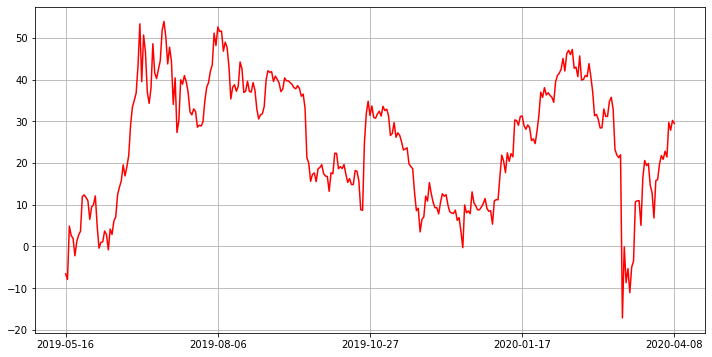

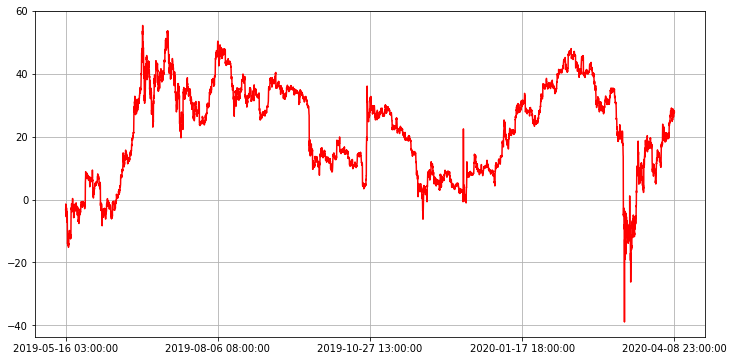

In [20]:
#regra de 0%
periodicity_list = df_detailed_strategy_2['periodicity'].unique()
model = 'buyandhold'

for periodicity in periodicity_list:

    df_filtered = df_detailed_strategy_2[ (df_detailed_strategy_2['periodicity'] == periodicity) ]


    fig, ax = plt.subplots(figsize=(12, 6))


    ax.plot(df_filtered['date_test'], df_filtered['real_balance'], label = 'Balanço', color="red") #label real_balance
    # ax.set_ylim(-200, 500)
    plt.xticks(np.arange(0, len(df_filtered['date_test']), int(len(df_filtered['date_test'])*0.25)))
    ax.grid()
#     ax.legend()
    fname = 'balanco_'+'S2_'+model+'_'+periodicity
    plt.savefig('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/figures/'+fname+'.png', dpi=150)
    plt.show()

### ESTRATEGIA 3 VOTING SYSTEM

In [21]:
data_resume = {
    'periodicity': [],
    'profit': [],
    'loses': [],
    'wins': [],
    'misses': [],
    'win_ratio': [],
    'balance': [],
}

data_detailed_aux = {
    'date_test': [],
    'model': [],
    'periodicity': [],
    'operation_type': [],
    'real_balance': [],
}

min_pct_for_operation = 0.00
usd_amount = 100
list_files = os.listdir('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test')

print("starting making the individuals predictions")
for file in list_files:
    
    file_aux = file.split('_')

    if file_aux[0] == 'test':

        model = file_aux[1].upper()
        periodicity = file_aux[2].split('.')[0].upper()
        
        if model == 'NAIVE':
            continue
        
        df_aux = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test/'+file, sep = '\t')      
                
        for i in range(len(df_aux) -1):
            
            y_test_predict = df_aux.iloc[i+1]['y_test_predict']
            y_test_real = df_aux.iloc[i+1]['y_test']
            y_test = df_aux.iloc[i]['y_test']
            date_test = df_aux.iloc[i]['date_test']
            
#             print('y_test_predict->', y_test_predict)
#             print('y_test_real->', y_test_real)
#             print('y_test->', y_test)
    
            if y_test_predict > y_test:
                if (y_test_predict/y_test - 1)*100 >= min_pct_for_operation:
                    operation = 1
                    real_balance = (y_test_real/y_test - 1)*usd_amount
            
            else:
                if (y_test/y_test_predict - 1)*100 >= min_pct_for_operation:
                    operation = -1
                    real_balance = (y_test/y_test_real - 1)*usd_amount
            
            data_detailed_aux['date_test'].append(date_test)
            data_detailed_aux['model'].append(model)
            data_detailed_aux['periodicity'].append(periodicity)
            data_detailed_aux['operation_type'].append(operation)
            data_detailed_aux['real_balance'].append(real_balance)
            
print("finish")
print("starting voting system")

df_aux = pd.DataFrame(data_detailed_aux).sort_values(by = 'date_test').reset_index(drop = True)

df_detailed_strategy_3 = pd.DataFrame([])

list_periodicity = df_aux['periodicity'].unique()

for periodicity in list_periodicity:
    
    balance = 0
    win_ratio = 0

    profit = 0
    wins = 0
    loses = 0
    misses = 0

    accumulated_expected_balance = 0
    is_operation = None
        
    df_filtered_by_periodicity = df_aux[ df_aux['periodicity'] == periodicity ]
    
    list_date_test = df_filtered_by_periodicity['date_test'].unique()
    
    for date_test in list_date_test:
        
        mask_date_test = df_filtered_by_periodicity['date_test'] == date_test
        df_filtered_by_date_test = df_filtered_by_periodicity[mask_date_test]
        
        mask_operation_type = df_filtered_by_date_test['operation_type'] > 0
        print('---')
        
        if df_filtered_by_date_test[mask_operation_type]['operation_type'].sum() > 3:
            
#             print("BUY")
            is_operation = True
            voting = df_filtered_by_date_test[mask_operation_type]['operation_type'].sum()
            operation_type = 1
            print('voting', voting)

        elif df_filtered_by_date_test[~mask_operation_type]['operation_type'].sum() < -3:
            
#             print("SELL")
            is_operation = True
            voting = df_filtered_by_date_test[~mask_operation_type]['operation_type'].sum()
            operation_type = -1
            print('voting', voting)

        else:
            
#             print('DO NOTHING')
            is_operation = False
            voting = 0
            operation_type = 0
        
        df_row = df_filtered_by_date_test.drop(columns=['model']).iloc[0]
        df_row['voting'] = voting
        df_row['operation_type'] = operation_type
        real_balance = df_row['real_balance']
        
        if is_operation == True:

            if real_balance > 0:
                profit += real_balance
                wins += 1

            else:
                loses += real_balance
                misses += 1
            
        is_operation = False
        
        df_row['real_balance'] = profit + loses
        df_detailed_strategy_3 = df_detailed_strategy_3.append(df_row, ignore_index = True)
        
    win_ratio = round(100*wins/(wins+misses), 2)
    balance = round(profit + loses, 2)
    
    data_resume['periodicity'].append(periodicity)
    data_resume['profit'].append(profit)
    data_resume['loses'].append(loses)
    data_resume['wins'].append(wins)
    data_resume['misses'].append(misses)
    data_resume['win_ratio'].append(win_ratio)
    data_resume['balance'].append(balance)

print("finish")
df_detailed_strategy_3 = df_detailed_strategy_3.sort_values(by = 'date_test').reset_index(drop = True)
df_resume_strategy_3 = pd.DataFrame(data_resume).sort_values(by = 'periodicity').reset_index(drop = True)

starting making the individuals predictions
finish
starting voting system
---
---
voting 6
---
---
voting 4
---
---
voting -4
---
voting -4
---
voting 5
---
---
voting 4
---
voting -4
---
voting 5
---
voting 5
---
---
voting 6
---
voting 4
---
---
voting 5
---
---
voting 5
---
voting -5
---
voting 5
---
---
voting -4
---
voting 4
---
---
voting 5
---
---
voting -5
---
voting 5
---
voting -5
---
voting 4
---
voting -4
---
voting 4
---
voting 4
---
voting 4
---
voting 5
---
voting -4
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting -4
---
voting 4
---
---
voting 6
---
---
voting 4
---
voting 5
---
---
voting 4
---
---
voting 5
---
voting -4
---
voting -4
---
voting 6
---
---
voting 4
---
voting 5
---
voting 4
---
voting -5
---
voting 4
---
---
voting -5
---
voting 6
---
voting -5
---
voting 4
---
voting 5
---
voting -4
---
voting 5
---
voting -4
---
voting 5
---
voting -4
---
voting -5
---
voting 4
---
---
voting -4
---
voting 4
---
voting 5
---
voting -4
---
voting 5
---
v

---
voting 5
---
voting 5
---
---
voting -4
---
---
voting 5
---
---
voting -4
---
voting -4
---
---
voting 6
---
---
---
voting 5
---
voting 6
---
---
---
voting 4
---
voting -5
---
voting -4
---
---
---
voting -4
---
voting -4
---
voting 6
---
voting 5
---
---
voting 5
---
voting 5
---
voting 4
---
---
voting 4
---
voting -4
---
voting -4
---
voting -4
---
voting 6
---
voting 5
---
voting 6
---
voting 5
---
---
voting 6
---
voting 6
---
voting 6
---
voting 5
---
voting 6
---
voting -4
---
voting 4
---
---
voting 6
---
voting 5
---
voting -5
---
voting -4
---
---
voting -4
---
voting -4
---
---
voting 6
---
voting 6
---
voting 6
---
voting 5
---
---
voting -4
---
voting 6
---
voting 5
---
voting 4
---
voting 6
---
voting 4
---
voting -4
---
---
---
voting 6
---
voting 5
---
voting -4
---
---
voting 5
---
voting 5
---
voting 6
---
voting 5
---
voting 6
---
voting 5
---
voting 6
---
voting 4
---
---
voting -4
---
voting -4
---
voting -5
---
---
voting 6
---
voting 6
---
voting 6
---
vot

---
voting 6
---
voting 4
---
voting 6
---
voting 6
---
voting 6
---
---
voting 5
---
voting 6
---
voting 4
---
voting 6
---
voting -5
---
voting -4
---
---
voting 4
---
voting 6
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 6
---
voting 5
---
voting -5
---
---
voting 6
---
voting 6
---
voting 4
---
voting 6
---
voting -5
---
voting -4
---
---
voting -5
---
voting -4
---
voting -4
---
---
voting 5
---
voting -5
---
---
voting -5
---
voting -4
---
voting 5
---
voting -4
---
---
voting -5
---
voting -4
---
voting 6
---
voting 6
---
voting 4
---
voting -5
---
voting 6
---
voting -4
---
voting 4
---
voting -5
---
voting -4
---
voting 6
---
voting 6
---
---
voting -4
---
voting -5
---
voting -4
---
voting -5
---
voting -4
---
voting 4
---
---
voting -5
---
voting 5
---
voting 6
---
voting 4
---
voting -5
---
voting 5
---
voting -5
---
voting 6
---
voting 6
---
voting -5
---
voting -5
---
voting -5
---
voting -4
---
voting 6
---
voting 4
---
voting -5
---
---
--

---
voting 4
---
---
voting 5
---
---
voting -5
---
voting 5
---
voting 5
---
voting 4
---
voting 4
---
voting -4
---
voting -4
---
voting -5
---
---
voting -4
---
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
voting -4
---
voting 6
---
voting 5
---
voting 6
---
voting 6
---
voting 5
---
voting -4
---
voting -4
---
voting -5
---
voting -5
---
---
---
voting 5
---
voting -4
---
voting -4
---
---
voting -4
---
voting -4
---
voting -4
---
---
voting -4
---
voting -5
---
voting -4
---
voting -4
---
---
voting 5
---
---
voting 5
---
voting -4
---
voting -4
---
---
voting -4
---
voting -4
---
voting 5
---
voting 5
---
voting 5
---
voting 6
---
voting 6
---
voting 4
---
voting -5
---
voting -5
---
---
voting 5
---
voting -4
---
voting -4
---
voting -4
---
---
voting 4
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
voting -5
---
voting -4
---
---
---
voting 6
---
voting 4
---
---
voting 6
---
voting 5
---
voting -4
---
voting -4
---
voting -4
---
---
vo

---
voting -4
---
voting -4
---
voting 5
---
voting 5
---
voting 5
---
voting 6
---
---
---
voting 5
---
---
voting 5
---
voting 6
---
voting 6
---
voting 6
---
voting -5
---
voting -4
---
voting -5
---
---
---
voting -4
---
voting 6
---
voting 6
---
voting 6
---
voting 6
---
voting -4
---
voting -4
---
voting 5
---
voting 4
---
voting 6
---
voting 6
---
voting -4
---
voting -4
---
voting -4
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
---
voting 6
---
voting 6
---
voting 6
---
voting 5
---
---
voting -4
---
voting -4
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting -6
---
voting -4
---
voting -4
---
voting -4
---
voting 4
---
voting 5
---
voting -6
---
voting -4
---
voting -5
---
voting -4
---
voting 5
---
voting -4
---
---
voting 6
---
voting 6
---
voting 5
---
voting 4
---
voting 5
---
voting 4
---
voting -4
---
voting -4
---
---
voting 5


voting 6
---
voting 5
---
voting 5
---
voting 5
---
voting 6
---
voting 5
---
voting 5
---
voting 4
---
---
voting -5
---
voting 5
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting 6
---
voting 6
---
voting 5
---
voting 5
---
voting 5
---
voting -4
---
voting -5
---
voting 6
---
voting 6
---
voting -5
---
voting -4
---
voting 5
---
voting 4
---
voting -5
---
voting -4
---
voting 5
---
voting -5
---
voting -4
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
---
voting 5
---
voting -5
---
voting -4
---
voting 5
---
voting -5
---
voting -5
---
voting -5
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting -6
---
voting -5
---
---
voting 4
---
voting -4
---
voting 5
---
voting 5
---
voting 4
---
voting 4
---
---
---
voting 6
---
voting -4
---
voting -5
---
voting -5
---
voting -4
---
voting 4
---
voting 6
---
voting 5
---
voting -4
---
voting 6
---
voting 5
---
voting -4
---
voting -4
---
---
voting 6
---
v

---
voting 6
---
voting 6
---
voting 6
---
voting 6
---
voting 4
---
---
---
voting 6
---
voting 5
---
voting 6
---
voting 5
---
---
voting -5
---
voting -4
---
voting -4
---
voting 6
---
voting 6
---
voting 6
---
voting 5
---
voting 5
---
voting 4
---
voting -4
---
voting -4
---
voting 4
---
voting 6
---
voting 6
---
voting 6
---
voting -4
---
voting -5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 6
---
voting 5
---
voting 4
---
voting -5
---
voting -4
---
---
voting 6
---
voting -4
---
voting -5
---
voting -5
---
---
voting 4
---
voting 5
---
voting 5
---
voting -4
---
voting 5
---
voting 6
---
voting -4
---
voting -4
---
voting 5
---
voting 4
---
voting -4
---
voting -4
---
voting 4
---
---
---
voting -4
---
---
voting 5
---
voting -5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting 4
---
voting 5
---
voting -4
---
voting -4
---
voting -5
---
voting -5
---
---
voting 6
---
---
v

---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
voting -5
---
voting -5
---
voting 6
---
voting 6
---
---
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
---
voting 5
---
voting -5
---
voting -4
---
---
voting -5
---
voting 5
---
voting 6
---
voting 5
---
voting 4
---
voting 6
---
voting 4
---
voting -5
---
voting -5
---
voting -4
---
voting -5
---
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting -4
---
---
voting 5
---
voting -4
---
voting -4
---
voting -5
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting 6
---
voting 6
---
voting 5
---
voting -4
---
voting 6
---
voting 6
---
voting 6
---
---
voting 6
---
voting 5
---
voting -5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting 6
---
voting 5
---


---
voting 4
---
voting 4
---
voting 4
---
voting 5
---
voting 6
---
voting 5
---
voting 6
---
voting -5
---
voting -5
---
voting -5
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting -5
---
voting -5
---
voting 5
---
voting 5
---
voting -6
---
voting -5
---
voting -6
---
voting -5
---
voting -4
---
voting -5
---
voting -5
---
voting -5
---
voting -4
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
---
voting -5
---
voting -5
---
voting -5
---
voting 5
---
voting 4
---
voting -5
---
voting -4
---
voting 5
---
voting -5
---
voting -5
---
---
voting 6
---
voting -4
---
voting 4
---
voting 5
---
voting 5
---
voting 4
---
voting -5
---
voting 5
---
voting 6
---
voting 4
---
voting -5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting 6
---
voting 5
---
voting -4
---
voting -4
---
vo

---
voting 5
---
voting 4
---
voting 5
---
voting -5
---
voting -4
---
voting -4
---
voting -5
---
voting -4
---
---
voting 6
---
voting 5
---
voting -6
---
voting -6
---
voting -5
---
voting -5
---
voting -5
---
voting -4
---
voting -4
---
voting -5
---
voting 5
---
voting 5
---
voting -5
---
voting -5
---
voting 5
---
voting -5
---
voting -6
---
voting -5
---
---
voting -5
---
voting -5
---
voting -5
---
voting 6
---
voting 5
---
voting -4
---
voting -5
---
voting -4
---
voting 5
---
voting -5
---
voting 5
---
voting 5
---
voting 4
---
voting -5
---
voting 4
---
voting 4
---
voting -6
---
voting -5
---
---
voting -4
---
voting -6
---
voting -4
---
voting 5
---
voting 4
---
voting -5
---
voting 5
---
voting 4
---
voting -4
---
voting -4
---
voting -4
---
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting -5
---
voting -5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting -5
---
voting 5
---
voti

---
---
voting 4
---
voting -5
---
voting -5
---
voting -5
---
voting -5
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
---
voting 5
---
voting -4
---
---
voting -4
---
voting 4
---
voting 6
---
voting 5
---
voting -4
---
voting 6
---
voting 6
---
voting 5
---
voting 6
---
voting 5
---
voting -4
---
voting -4
---
voting -4
---
voting 5
---
voting 5
---
voting 6
---
voting 6
---
voting 6
---
voting 4
---
voting -4
---
voting 6
---
voting 6
---
voting 5
---
voting 6
---
voting 5
---
voting 5
---
voting -4
---
---
voting 6
---
voting 5
---
voting 5
---
voting 6
---
voting -4
---
voting -4
---
voting 6
---
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting -4
---
voting -4
---
voting 5
---
voting -5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
voting -4
---
voting -4
---
---
voting -4
---
---
voting 6
---
voting 6
---
voting -4
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting 4
--

---
voting 5
---
voting 5
---
voting 5
---
voting -5
---
voting -5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 5
---
voting 4
---
voting -5
---
voting -4
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 4
---
voting 5
---
voting 5
---
voting -5
---
voting -4
---
voting 5
---
voting -5
---
voting -5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting 5
---
voting 6
---
voting 5
---
voting 5
---
voting 4
---
---
voting 5
---
voting 4
---
voting 5
---
voting 4
---
voting 4
---
voting 4
---
voting -5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 5
---
voting 5
---
voting 4
---
voting -5
---
voting 5
---
voting 4
---
voting -5
---
voting -5
---
voting -4
---
voting -5
---
voting -5
---
voting -5
---
voting 5
---
voting 5
---
voting -5
---
voting -5
---
voting -5
---
---
voting 5
---
voting 5
---
voting 5
---
voting -6
---
voting -5
---
voting -5
---
---
voting 5
---
voting 5
---


---
voting 5
---
voting 6
---
voting 5
---
voting -4
---
voting 6
---
voting 5
---
voting -4
---
voting 5
---
---
voting -5
---
voting 5
---
voting 5
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -5
---
voting -4
---
voting -4
---
voting 6
---
voting 5
---
voting 4
---
voting 6
---
voting -5
---
voting -5
---
---
voting -4
---
voting 6
---
voting -4
---
voting -4
---
---
voting -5
---
voting -5
---
voting 5
---
voting 5
---
voting 5
---
voting 5
---
voting 4
---
voting 5
---
voting 4
---
voting -4
---
voting 5
---
voting 5
---
voting -4
---
voting -4
---
voting -4
---
voting 6
---
voting 4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting 6
---
voting 5
---
voting -4
---
---
voting -5
---
voting -4
---
voting 5
---
voting -4
---
voting -5
---
voting -4
---
voting -4
---
---
voting -4
---
voting -4
---
---
---
voting -4
---
voting 6
---
voting 6
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting -4
---
voting 6
---
voting -4
---
---


In [22]:
# df_detailed_strategy_3
df_resume_strategy_3

df_resume_strategy_3.columns = ['Periodicidade', 'Ganho', 'Perca', 'Acertos', 'Erros', 'Porcentagem de acertos', 'Balanço']
df_resume_strategy_3

,Periodicidade,Ganho,Perca,Acertos,Erros,Porcentagem de acertos,Balanço
0,1D,310.414634,-406.806786,118,130,47.58,-96.39
1,1H,1870.070076,-1683.801004,3782,3198,54.18,186.27


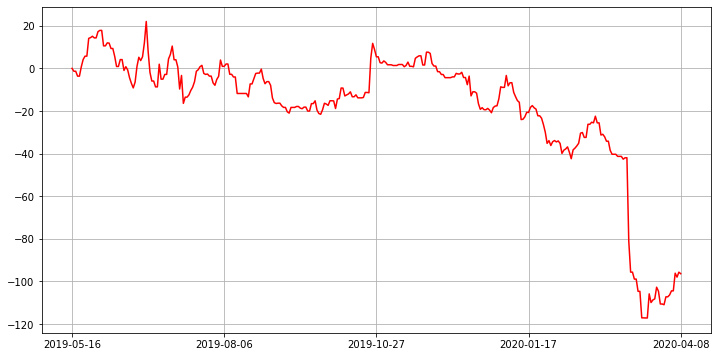

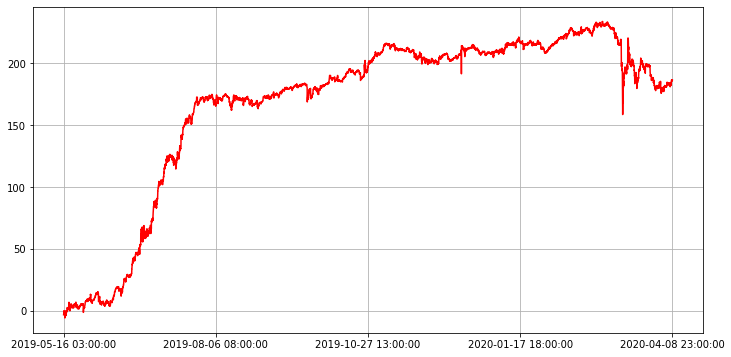

In [24]:
#regra de 0%
periodicity_list = df_detailed_strategy_3['periodicity'].unique()
model = 'votingsystem'

for periodicity in periodicity_list:

    df_filtered = df_detailed_strategy_3[ (df_detailed_strategy_3['periodicity'] == periodicity) ]


    fig, ax = plt.subplots(figsize=(12, 6))


    ax.plot(df_filtered['date_test'], df_filtered['real_balance'], label = 'Balanço', color="red") #label real_balance
    # ax.set_ylim(-200, 500)
    plt.xticks(np.arange(0, len(df_filtered['date_test']), int(len(df_filtered['date_test'])*0.25)))
    ax.grid()
    # ax.legend()
    fname = 'balanco_'+'S3_'+model+'_'+periodicity
    plt.savefig('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/figures/'+fname+'.png', dpi=150)
    plt.show()

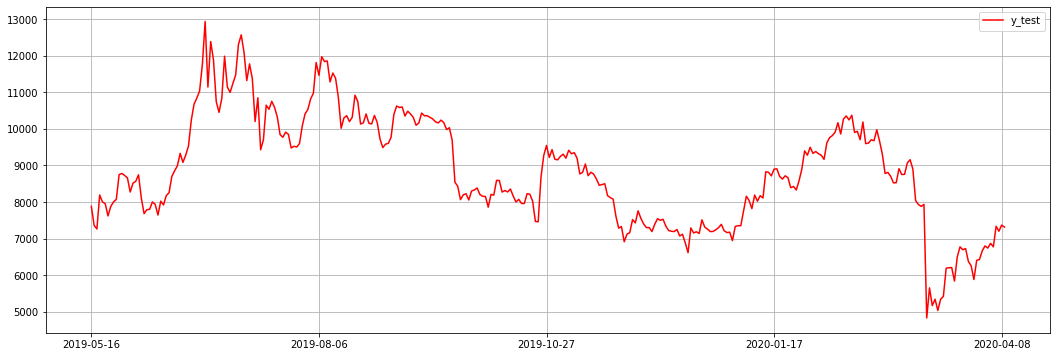

In [22]:
"""
visualiza o comportamento do preço no periodo de test
"""

df_1d_test = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test/test_ma_1d.csv', sep = '\t')
df_1h_test = pd.read_csv('/home/ricardo/Documents/tcc_files/TCC/tcc_scripts_notebook/datasets/train_test/test_ma_1h.csv', sep = '\t')

df_filtered = df_1d_test.copy()

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(df_filtered['date_test'], df_filtered['y_test'], label = 'y_test', color="red")
# ax.set_ylim(-200, 500)
plt.xticks(np.arange(0, len(df_filtered['date_test']), int(len(df_filtered['date_test'])*0.25)))
ax.grid()
ax.legend()
plt.show()